In [1]:
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 105.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4


In [2]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 24.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=542954b37eaebf623e345f79f645a7d8747112635eb9c8ca05810b472b38b0fd
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [3]:
import pyspark

In [4]:
import pandas as pd
pd.read_csv('info.csv')

,Name,Age
0,T,14
1,H,52
2,D,7
3,A,8
4,B,16
5,N,45
6,M,3
7,L,26
8,K,64
9,Q,92


In [5]:
from pyspark.sql import SparkSession 

In [6]:
spark=SparkSession.builder.appName('Partise').getOrCreate()

In [7]:
spark

In [8]:
df_spark=spark.read.option("header", True).csv('info.csv')
df_spark.show()

+----+---+
|Name|Age|
+----+---+
|   T| 14|
|   H| 52|
|   D|  7|
|   A|  8|
|   B| 16|
|   N| 45|
|   M|  3|
|   L| 26|
|   K| 64|
|   Q| 92|
|   S| 19|
|   P| 30|
|   Y| 29|
|   G| 34|
+----+---+



In [9]:
df_spark.select('Age').show()

+---+
|Age|
+---+
| 14|
| 52|
|  7|
|  8|
| 16|
| 45|
|  3|
| 26|
| 64|
| 92|
| 19|
| 30|
| 29|
| 34|
+---+



In [10]:
df_spark.createOrReplaceTempView("df_spark")

In [11]:
!wget https://raw.githubusercontent.com/demanejar/retails/master/resources/retails.csv

--2023-04-07 07:00:10--  https://raw.githubusercontent.com/demanejar/retails/master/resources/retails.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43954909 (42M) [text/plain]
Saving to: ‘retails.csv’

retails.csv         100%[===================>]  41.92M   149MB/s    in 0.3s    

2023-04-07 07:00:11 (149 MB/s) - ‘retails.csv’ saved [43954909/43954909]



In [12]:
df=SparkSession.builder.appName('Part1').getOrCreate()
df=df.read.option('header', True).csv('retails.csv')
df.show()

+---------+---------+--------------------+--------+------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity| InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/10 8:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/10 8:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/10 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/10 8:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/10 8:26|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|12/1/10 8:26|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|12/1/10 8:26|     4.25|     17850|United

Part 1

Câu hỏi: Có tổng bao nhiêu giao dịch, sản phẩm và khách hàng khác nhau?

In [13]:
flag=df.select("CustomerID").distinct().count()-1
print("Khách hàng : ", flag)

Khách hàng :  4372


In [14]:
flag=df.select("StockCode").distinct().count()
print("Sản phẩm : ", flag)

Sản phẩm :  4070


In [15]:
flag=df.select("InvoiceNo").distinct().count()
print("Giao dịch : ", flag)

Giao dịch :  25900


In [16]:
from pyspark.sql.functions import countDistinct

# Đếm số lượng giao dịch khác nhau
num_transactions = df.select(countDistinct('InvoiceNo')).collect()[0][0]

# Đếm số lượng sản phẩm khác nhau
num_products = df.select(countDistinct('StockCode')).collect()[0][0]

# Đếm số lượng khách hàng khác nhau
num_customers = df.select(countDistinct('CustomerID')).collect()[0][0]

print(f"Tổng số giao dịch: {num_transactions}")
print(f"Tổng số sản phẩm: {num_products}")
print(f"Tổng số khách hàng: {num_customers}")

Tổng số giao dịch: 25900
Tổng số sản phẩm: 4070
Tổng số khách hàng: 4372


Part 2

Câu hỏi: Tỉ lệ khách hàng không có thông *tin*

In [17]:
flag =df.select("CustomerID").filter(df["CustomerID"].isNull()).count()/float(df.select("CustomerID").distinct().count())
print("Tỉ lệ khách hàng không có thông tin : ", flag)

Tỉ lệ khách hàng không có thông tin :  30.889549508346672


Part 3

Câu hỏi: Đâu là nước có số lượng đơn hàng (Quantity) nhiều thứ 3?

In [18]:
df=df.withColumn('Quantity', df['Quantity'].cast('int'))
df.groupBy('Country').sum('Quantity').sort('sum(Quantity)',ascending=False).show()

+---------------+-------------+
|        Country|sum(Quantity)|
+---------------+-------------+
| United Kingdom|      4263829|
|    Netherlands|       200128|
|           EIRE|       142637|
|        Germany|       117448|
|         France|       110480|
|      Australia|        83653|
|         Sweden|        35637|
|    Switzerland|        30325|
|          Spain|        26824|
|          Japan|        25218|
|        Belgium|        23152|
|         Norway|        19247|
|       Portugal|        16180|
|        Finland|        10666|
|Channel Islands|         9479|
|        Denmark|         8188|
|          Italy|         7999|
|         Cyprus|         6317|
|      Singapore|         5234|
|        Austria|         4827|
+---------------+-------------+
only showing top 20 rows



In [19]:
flag = df.groupBy('Country').sum('Quantity').sort('sum(Quantity)',ascending=False).select('Country').take(3)
print("Nước có số lượng đơn hàng (Quantity) nhiều thứ 3 : ",flag[2])

Nước có số lượng đơn hàng (Quantity) nhiều thứ 3 :  Row(Country='EIRE')


Part 4

Câu hỏi: Từ nào xuất hiện ít và nhiều nhất trong phần Description?

In [20]:
import collections
from pyspark import SparkContext
from pyspark.sql.functions import desc

flag=df.groupBy('Description').count().orderBy('count')
least_common_word = flag.first()['Description']
print("Từ xuất hiện ít nhất là:", least_common_word)
flag=df.groupBy('Description').count().orderBy(desc('count'))
most_common_word = flag.first()['Description']
print("Từ xuất hiện nhiều nhất trong phần Description là:", most_common_word)

Từ xuất hiện ít nhất là: PINK BOUDOIR T-LIGHT HOLDER
Từ xuất hiện nhiều nhất trong phần Description là: WHITE HANGING HEART T-LIGHT HOLDER


Part 5

Câu hỏi: Sản phẩm nào bán được số lượng (Quantity) lớn nhất ở United Kingdom?

In [21]:
UK = df.filter(df.Country == 'United Kingdom')
product = UK.groupBy('StockCode').sum('Quantity')
sort_sum = product.sort('sum(Quantity)', ascending=False)
most_sold_product = sort_sum.first()['StockCode']
name = df.filter(df.StockCode == most_sold_product).select('Description').distinct().collect()[0]['Description']
print('Sản phẩm bán được số lượng lớn nhất ở United Kingdom là : ', name)

Sản phẩm bán được số lượng lớn nhất ở United Kingdom là :  POPCORN HOLDER


Example 1: Simple select

In [22]:
dt=SparkSession.builder.appName('Group').getOrCreate()
dt=dt.read.option('header', True).csv('input.csv')
dt.show()

+---+-----------------+----------+
| id|             name|population|
+---+-----------------+----------+
|  0|           Warsaw|   1764615|
|  1|Villeneuve-Loubet|     15020|
|  2|           Vranje|     83524|
|  3|       Pittsburgh|   1775634|
+---+-----------------+----------+



Query population lớn nhất

In [23]:
dt=dt.withColumn('population',dt['population'].cast('int'))
dt.select('population').agg({'population':'max'}).show()

+---------------+
|max(population)|
+---------------+
|        1775634|
+---------------+



Nhóm lại các id cùng group và cho ra output như sau: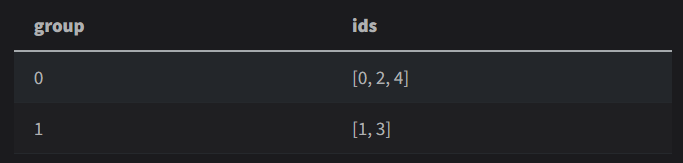


In [24]:
t=SparkSession.builder.appName('Group').getOrCreate()
t=t.read.option('header', True).csv('InputGroup.csv')
t.show()

+---+-----+
| id|group|
+---+-----+
|  0|    0|
|  1|    1|
|  2|    0|
|  3|    1|
|  4|    0|
+---+-----+



In [25]:
t.groupBy('group').agg({'id':'collect_list'}).sort('group').show()

+-----+----------------+
|group|collect_list(id)|
+-----+----------------+
|    0|       [0, 2, 4]|
|    1|          [1, 3]|
+-----+----------------+



In [26]:
from pyspark.sql.functions import collect_list
t.groupBy('group').agg(collect_list('id').alias('ids')).sort('group').show()

+-----+---------+
|group|      ids|
+-----+---------+
|    0|[0, 2, 4]|
|    1|   [1, 3]|
+-----+---------+



Pivot trong Python là một phương pháp thay đổi cấu trúc của bảng dữ liệu, từ dạng "dài" (long) thành dạng "rộng" (wide), trong đó các giá trị của một cột được chuyển thành các cột mới, và các giá trị của các cột khác được lấy làm giá trị của các ô trong bảng mới. Pivot thường được sử dụng trong xử lý dữ liệu để thống kê, phân tích, và trực quan hóa dữ liệu.

Trong Python, bạn có thể sử dụng phương thức pivot() của pandas để pivot bảng dữ liệu. Phương thức này có các tham số sau:

* index: Tên cột hoặc danh sách các cột sẽ được sử dụng làm các giá trị chính (index) của bảng mới.

* columns: Tên cột hoặc danh sách các cột sẽ được chuyển đổi thành các cột mới trong bảng mới.

* values: Tên cột hoặc danh sách các cột sẽ được sử dụng làm giá trị của các ô trong bảng mới.

* aggfunc: Hàm thống kê sẽ được sử dụng để tính toán các giá trị của các ô trong bảng mới. Mặc định là hàm mean().

* fill_value: Giá trị sẽ được sử dụng để thay thế các ô có giá trị null trong bảng mới.

Ví dụ, để pivot bảng dữ liệu "long_table" thành bảng mới với giá trị của cột "value" chuyển thành các cột mới dựa trên giá trị của cột "variable", bạn có thể sử dụng đoạn mã sau:

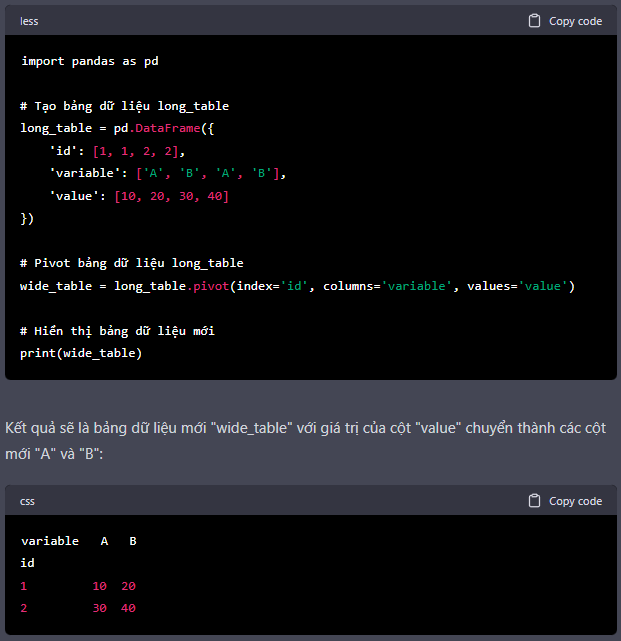

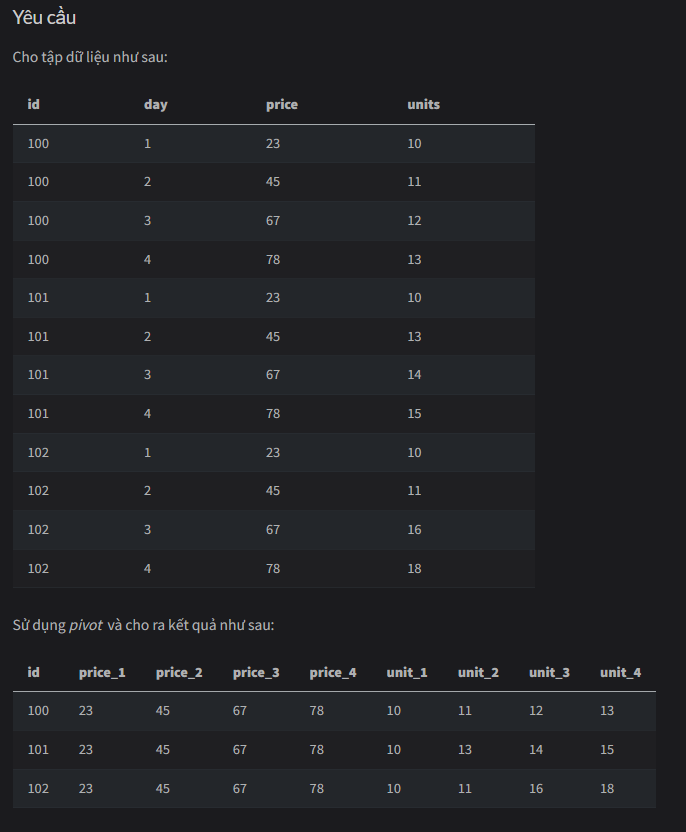

In [27]:
from pyspark.conf import SparkConf
p=SparkSession.builder.config(conf=SparkConf()).appName('Pivot').getOrCreate()
p=p.read.option('header',True).csv('pivot.csv')
p.show()

+---+---+-----+-----+
| id|day|price|units|
+---+---+-----+-----+
|100|  1|   23|   10|
|100|  2|   45|   11|
|100|  3|   67|   12|
|100|  4|   78|   13|
|101|  1|   23|   10|
|101|  2|   45|   13|
|101|  3|   67|   14|
|101|  4|   78|   15|
|102|  1|   23|   10|
|102|  2|   45|   11|
|102|  3|   67|   16|
|102|  4|   78|   18|
+---+---+-----+-----+



In [41]:
from pyspark.sql.functions import concat, lit, first
t = p.withColumn("price_day", concat(lit("price_"), p["day"])).groupBy("id").pivot("price_day").agg({'price':'first'})
t.show()

+---+-------+-------+-------+-------+
| id|price_1|price_2|price_3|price_4|
+---+-------+-------+-------+-------+
|100|     23|     45|     67|     78|
|101|     23|     45|     67|     78|
|102|     23|     45|     67|     78|
+---+-------+-------+-------+-------+



In [42]:
n = p.withColumn("unit_day", concat(lit("unit_"), p["day"])).groupBy("id").pivot("unit_day").agg({'units':'first'})
n.show()

+---+------+------+------+------+
| id|unit_1|unit_2|unit_3|unit_4|
+---+------+------+------+------+
|100|    10|    11|    12|    13|
|101|    10|    13|    14|    15|
|102|    10|    11|    16|    18|
+---+------+------+------+------+



In [43]:
t.join(n,'id').sort('id').show()

+---+-------+-------+-------+-------+------+------+------+------+
| id|price_1|price_2|price_3|price_4|unit_1|unit_2|unit_3|unit_4|
+---+-------+-------+-------+-------+------+------+------+------+
|100|     23|     45|     67|     78|    10|    11|    12|    13|
|101|     23|     45|     67|     78|    10|    13|    14|    15|
|102|     23|     45|     67|     78|    10|    11|    16|    18|
+---+-------+-------+-------+-------+------+------+------+------+



# window function:

Yêu cầu:

*   Load dữ liệu vào spark từ file csv
*   Tính running_total hay tổng tích lũy số item đã bán được đến thời điểm time.

Output có dạng như sau:

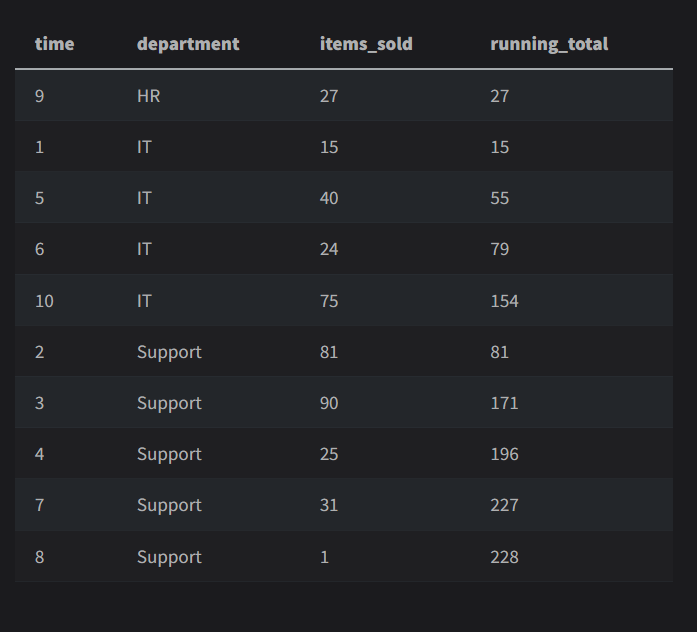

In [83]:
k=SparkSession.builder.config(conf=SparkConf()).appName('window function').getOrCreate()
k=k.read.option('header',True).csv('windowfunction.csv')
k.show()

+----+----------+----------+
|time|department|items_sold|
+----+----------+----------+
|   1|        IT|        15|
|   2|   Support|        81|
|   3|   Support|        90|
|   4|   Support|        25|
|   5|        IT|        40|
|   6|        IT|        24|
|   7|   Support|        31|
|   8|   Support|         1|
|   9|        HR|        27|
|  10|        IT|        75|
+----+----------+----------+



In [92]:
from pyspark.sql.window import Window
from pyspark.sql.functions import sum

k.withColumn('running_total', sum('items_sold').over(Window.partitionBy('department').orderBy('time','department').rowsBetween(Window.unboundedPreceding, Window.currentRow))).show()

+----+----------+----------+-------------+
|time|department|items_sold|running_total|
+----+----------+----------+-------------+
|   9|        HR|        27|         27.0|
|   1|        IT|        15|         15.0|
|  10|        IT|        75|         90.0|
|   5|        IT|        40|        130.0|
|   6|        IT|        24|        154.0|
|   2|   Support|        81|         81.0|
|   3|   Support|        90|        171.0|
|   4|   Support|        25|        196.0|
|   7|   Support|        31|        227.0|
|   8|   Support|         1|        228.0|
+----+----------+----------+-------------+

